In [1]:
#! /usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.special import comb
from sklearn.metrics import r2_score

# read a csv file
df = pd.read_csv('/home/giorgio/ros/spline/trajectory.csv')
# df = pd.read_csv('/home/lar-tesi01/ros/spline/trajectory.csv')

j1 = df['J1'].values
j2 = df['J2'].values
j3 = df['J3'].values
j4 = df['J4'].values
j5 = df['J5'].values
j6 = df['J6'].values
index = df.index.values

# compute velocity and acceleration
v1 = np.diff(j1)
v2 = np.diff(j2)
v3 = np.diff(j3)
v4 = np.diff(j4)
v5 = np.diff(j5)
v6 = np.diff(j6)

a1 = np.diff(v1)
a2 = np.diff(v2)
a3 = np.diff(v3)
a4 = np.diff(v4)
a5 = np.diff(v5)
a6 = np.diff(v6)

def media_indici_consecutivi(arr):
    arr = np.sort(arr)
    arr = np.unique(arr)
    diff = np.diff(arr)
    split_points = np.where(diff != 1)[0] + 1
    sub_arrays = np.split(arr, split_points)
    result = [int(round(np.mean(sub))) for sub in sub_arrays]
    return result

In [2]:
# find the epicenters of the impulses
coeff = 4

epicentri = np.where(a1 > np.mean(a1) + coeff * np.std(a1))[0]
epicentri = np.concatenate((epicentri, np.where(a2 > np.mean(a2) + coeff * np.std(a2))[0]))
epicentri = np.concatenate((epicentri, np.where(a3 > np.mean(a3) + coeff * np.std(a3))[0]))
epicentri = np.concatenate((epicentri, np.where(a4 > np.mean(a4) + coeff * np.std(a4))[0]))
epicentri = np.concatenate((epicentri, np.where(a5 > np.mean(a5) + coeff * np.std(a5))[0]))
epicentri = np.concatenate((epicentri, np.where(a6 > np.mean(a6) + coeff * np.std(a6))[0]))

print('Punti Trovati: ', epicentri, '\nNum: ', len(epicentri))

result = media_indici_consecutivi(epicentri)
print('Epicentri: ', result)


intervallo = int(len(index) / 25)
print('Intervallo: ', intervallo)

primo = np.arange(result[0] - intervallo, result[0] + intervallo, 1, dtype=int)
secondo = np.arange(result[1] - intervallo, result[1] + intervallo, 1, dtype=int)
index_del = np.concatenate((primo, secondo), dtype=int)

j1_new = np.delete(j1, index_del)
j2_new = np.delete(j2, index_del)
j3_new = np.delete(j3, index_del)
j4_new = np.delete(j4, index_del)
j5_new = np.delete(j5, index_del)
j6_new = np.delete(j6, index_del)
index_new = np.delete(index, index_del)

# interpolo i punti rimasti con una cubic spline
cs1 = CubicSpline(index_new, j1_new)
cs2 = CubicSpline(index_new, j2_new)
cs3 = CubicSpline(index_new, j3_new)
cs4 = CubicSpline(index_new, j4_new)
cs5 = CubicSpline(index_new, j5_new)
cs6 = CubicSpline(index_new, j6_new)

j1_new = cs1(index)
j2_new = cs2(index)
j3_new = cs3(index)
j4_new = cs4(index)
j5_new = cs5(index)
j6_new = cs6(index)

v1_new = np.diff(j1_new)
v2_new = np.diff(j2_new)
v3_new = np.diff(j3_new)
v4_new = np.diff(j4_new)
v5_new = np.diff(j5_new)
v6_new = np.diff(j6_new)

a1_new = np.diff(v1_new)
a2_new = np.diff(v2_new)
a3_new = np.diff(v3_new)
a4_new = np.diff(v4_new)
a5_new = np.diff(v5_new)
a6_new = np.diff(v6_new)

# calcolo il coefficiente di variazione di a1
cv_a1 = np.std(a1) / np.mean(a1)
cv_a1_new = np.std(a1_new) / np.mean(a1_new)
cv_a2 = np.std(a2) / np.mean(a2)
cv_a2_new = np.std(a2_new) / np.mean(a2_new)
cv_a3 = np.std(a3) / np.mean(a3)
cv_a3_new = np.std(a3_new) / np.mean(a3_new)
cv_a4 = np.std(a4) / np.mean(a4)
cv_a4_new = np.std(a4_new) / np.mean(a4_new)
cv_a5 = np.std(a5) / np.mean(a5)
cv_a5_new = np.std(a5_new) / np.mean(a5_new)
cv_a6 = np.std(a6) / np.mean(a6)
cv_a6_new = np.std(a6_new) / np.mean(a6_new)

print('')
print('Coef. var. a1: ', round(cv_a1), '\tCoef. var. a1 new: ', round(cv_a1_new))
print('Coef. var. a2: ', round(cv_a2), '\tCoef. var. a2 new: ', round(cv_a2_new))
print('Coef. var. a3: ', round(cv_a3), '\tCoef. var. a3 new: ', round(cv_a3_new))
print('Coef. var. a4: ', round(cv_a4), '\tCoef. var. a4 new: ', round(cv_a4_new))
print('Coef. var. a5: ', round(cv_a5), '\tCoef. var. a5 new: ', round(cv_a5_new))
print('Coef. var. a6: ', round(cv_a6), '\tCoef. var. a6 new: ', round(cv_a6_new))
print('')

mean_coeff_var = (cv_a1 + cv_a2 + cv_a3 + cv_a4 + cv_a5 + cv_a6) / 6
mean_coeff_var_new = (cv_a1_new + cv_a2_new + cv_a3_new + cv_a4_new + cv_a5_new + cv_a6_new) / 6

print('Mean Coef. var.: ', mean_coeff_var, 'Mean Coef. var. new: ', mean_coeff_var_new)

Punti Trovati:  [4349 4350 4351 7595 7596 7597 7598 4348 4349 4350 4351 7595 7596 7597
 7598 4351 7595 7596 7597 7598 7599 4352 4353 7594 4352 4353 7594 4350
 4351 7595 7596 7597 7598 7599] 
Num:  34
Epicentri:  [4350, 7596]
Intervallo:  629

Coef. var. a1:  134915 	Coef. var. a1 new:  273
Coef. var. a2:  -6024 	Coef. var. a2 new:  -34
Coef. var. a3:  19024 	Coef. var. a3 new:  129
Coef. var. a4:  48016 	Coef. var. a4 new:  142
Coef. var. a5:  32778 	Coef. var. a5 new:  196
Coef. var. a6:  -57510 	Coef. var. a6 new:  -108

Mean Coef. var.:  28533.242537407135 Mean Coef. var. new:  99.5316098995658


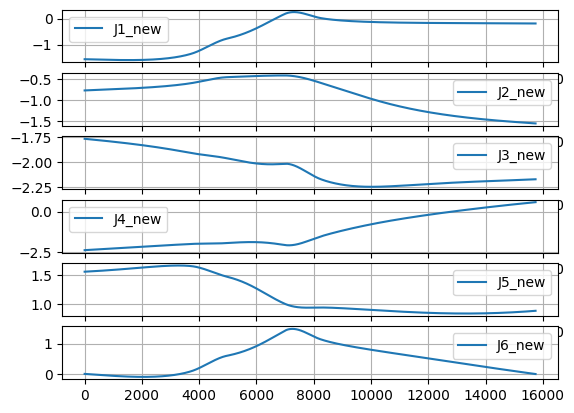

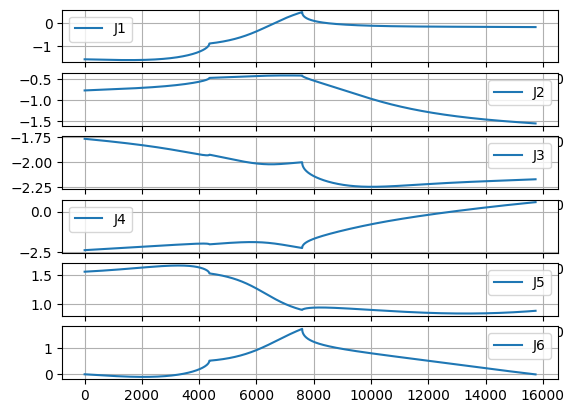

In [3]:
plt.figure(1)
plt.subplot(611)
plt.plot(index, j1_new, label='J1_new')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(612)
plt.plot(index, j2_new, label='J2_new')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(613)
plt.plot(index, j3_new, label='J3_new')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(614)
plt.plot(index, j4_new, label='J4_new')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(615)
plt.plot(index, j5_new, label='J5_new')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(616)
plt.plot(index, j6_new, label='J6_new')
plt.legend(loc='best')
plt.grid(True)

plt.figure(2)
plt.subplot(611)
plt.plot(index, j1, label='J1')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(612)
plt.plot(index, j2, label='J2')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(613)
plt.plot(index, j3, label='J3')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(614)
plt.plot(index, j4, label='J4')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(615)
plt.plot(index, j5, label='J5')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(616)
plt.plot(index, j6, label='J6')
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [4]:
# save in csv file
df_new = pd.DataFrame({'J1': j1_new, 'J2': j2_new, 'J3': j3_new, 'J4': j4_new, 'J5': j5_new, 'J6': j6_new})
df_new.to_csv('/home/giorgio/ros/spline/trajectory_new.csv')